### Exploratory and Results visualizations :
* **Importing necessary libraries**
* **Loading the train and test data with predicted results from processed directory**
* **Model Evaluation**
    * ***Performance Metrics Report***
    * ***Comparing the performance metrics of all models***
    * ***Finding out the best geralized model using Train accuracy and Test accuracy***
* **Displaying the result of the best generalized model**
* **Permutation importance for feature evaluation**
* **Exporting the finalized model**

#### Importing necessary libraries

In [221]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Load the model for Feature importance
import pickle

# Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

#Permutation importance for feature evaluation
from sklearn.inspection import permutation_importance

#### Loading the test data with predicted results from processed directory

In [222]:
#Loading the data
processed_file_location = 'C:/Users/User/Desktop/E10901-PR2-V18_Certified Data Scientist - Project/data/processed/'

# Files are generated by predict_model.ipynb
train_data_results_df = pd.read_csv(processed_file_location +'train_data_with_predicted_results.csv')
test_data_results_df = pd.read_csv(processed_file_location +'test_data_with_predicted_results.csv')

In [205]:
train_data_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Unnamed: 0                                                960 non-null    int64 
 1   Age                                                       960 non-null    int64 
 2   MaritalStatus                                             960 non-null    object
 3   EmpDepartment                                             960 non-null    object
 4   EmpJobRole                                                960 non-null    object
 5   BusinessTravelFrequency                                   960 non-null    object
 6   DistanceFromHome                                          960 non-null    int64 
 7   EmpEducationLevel                                         960 non-null    int64 
 8   EmpEnvironmentSatisfaction    

In [206]:
train_data_results_df.head()

,Unnamed: 0,Age,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,Actual_PerformanceRating,Predicted_PerformanceRating_Logistic_Regression,Predicted_PerformanceRating_Support Vector Classifier_1,Predicted_PerformanceRating_Support_Vector_Classifier_2,Predicted_PerformanceRating_Decision_Tree_Classifier,Predicted_PerformanceRating_Random_Forest_Classifier,Predicted_PerformanceRating_AdaBoost_Classifier,Predicted_PerformanceRating_Gradient_Boosting_Classifier,Predicted_PerformanceRating_Stacking_Classifier
0,0,28,Single,Sales,Sales Executive,Travel_Frequently,7,3,3,55,3,2,0,No,14,4,3,2,1,No,3,3,3,3,3,3,3,3,3
1,1,25,Single,Sales,Sales Executive,Travel_Rarely,4,2,2,99,2,2,1,Yes,11,2,3,4,1,No,2,2,2,2,2,2,2,2,2
2,2,25,Single,Research & Development,Research Scientist,Travel_Rarely,1,3,4,40,3,1,1,No,18,4,2,2,2,No,3,4,3,3,3,3,3,3,3
3,3,31,Married,Sales,Sales Executive,Travel_Rarely,5,3,1,51,3,2,1,No,19,3,3,2,0,No,4,3,4,3,2,4,3,4,4
4,4,30,Married,Sales,Sales Representative,Travel_Rarely,2,1,3,72,3,1,1,No,18,1,3,0,0,No,3,3,3,3,3,3,3,3,3


In [207]:
test_data_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Unnamed: 0                                                240 non-null    int64 
 1   Age                                                       240 non-null    int64 
 2   MaritalStatus                                             240 non-null    object
 3   EmpDepartment                                             240 non-null    object
 4   EmpJobRole                                                240 non-null    object
 5   BusinessTravelFrequency                                   240 non-null    object
 6   DistanceFromHome                                          240 non-null    int64 
 7   EmpEducationLevel                                         240 non-null    int64 
 8   EmpEnvironmentSatisfaction    

In [208]:
test_data_results_df.head()

,Unnamed: 0,Age,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,Actual_PerformanceRating,Predicted_PerformanceRating_Logistic_Regression,Predicted_PerformanceRating_Support Vector Classifier_1,Predicted_PerformanceRating_Support_Vector_Classifier_2,Predicted_PerformanceRating_Decision_Tree_Classifier,Predicted_PerformanceRating_Random_Forest_Classifier,Predicted_PerformanceRating_AdaBoost_Classifier,Predicted_PerformanceRating_Gradient_Boosting_Classifier,Predicted_PerformanceRating_Stacking_Classifier
0,0,35,Married,Development,Business Analyst,Travel_Rarely,23,4,3,30,3,1,3,Yes,15,3,3,2,2,No,3,3,3,3,3,3,3,3,3
1,1,26,Single,Development,Developer,Travel_Rarely,24,3,3,66,1,1,1,Yes,18,2,1,0,0,Yes,3,3,3,3,3,3,3,3,3
2,2,36,Married,Sales,Sales Executive,Travel_Rarely,17,2,3,33,2,2,2,No,16,3,1,2,1,No,2,3,3,3,3,3,3,3,3
3,3,53,Married,Finance,Finance Manager,Travel_Rarely,24,4,2,48,4,3,3,No,15,3,3,3,1,No,2,2,2,2,2,2,3,2,2
4,4,34,Divorced,Development,Business Analyst,Travel_Rarely,6,4,3,45,2,2,6,No,15,3,3,0,0,No,3,3,3,3,3,3,3,3,3


Unnamed: 0 column is unwanted column present in both train_data_results_df and test_data_results_df

#### Model Evaluation

#### Performance Metrics Report

In [224]:
# Scores are taken from src -> models -> train_model.ipynb 
cv_f1_macro_score = [0.7692,0.7648,0.7902,0.6591,0.7787,0.6547,0.7472,0.8173]
cv_std_score = [0.0135,0.0059,0.0148,0.0206,0.0229,0.0442,0.0048,0.0266]

trained_models = ['Logistic_Regression',
                  'Support Vector Classifier_1',
                  'Support_Vector_Classifier_2',
                  'Decision_Tree_Classifier',
                  'Random_Forest_Classifier',
                  'AdaBoost_Classifier',
                  'Gradient_Boosting_Classifier',
                  'Stacking_Classifier']

# Creating empty list to performance metrics of all models
Train_Accuracy = []
Test_Accuracy = []
f1_macro_score = []
precision_macro_score = []
recall_macro_score = []

# Stored performance metrics for all trained_models
# Macro average score is the unweighted mean of the scores calculated per class(f1_score,precision,recall)
for i in range(21,29):
    Train_Accuracy.append(accuracy_score(train_data_results_df[train_data_results_df.columns[20]],
                                         train_data_results_df[train_data_results_df.columns[i]]))
    Test_Accuracy.append(accuracy_score(test_data_results_df[train_data_results_df.columns[20]],
                                        test_data_results_df[train_data_results_df.columns[i]]))
    f1_macro_score.append(f1_score(test_data_results_df[train_data_results_df.columns[20]],
                                        test_data_results_df[train_data_results_df.columns[i]],average='macro'))
    precision_macro_score.append(precision_score(test_data_results_df[train_data_results_df.columns[20]],
                                        test_data_results_df[train_data_results_df.columns[i]],average='macro'))
    recall_macro_score.append(recall_score(test_data_results_df[train_data_results_df.columns[20]],
                                        test_data_results_df[train_data_results_df.columns[i]],average='macro'))
    
performance_metrics = list(zip(cv_f1_macro_score,cv_std_score,Train_Accuracy,Test_Accuracy,
                              f1_macro_score,precision_macro_score,recall_macro_score))
performance_metrics_df = pd.DataFrame(performance_metrics,
                                      columns=['cv_f1_macro_score','cv_std_score','Train_Accuracy','Test_Accuracy',
                                               'f1_macro_score','precision_macro_score','recall_macro_score'],
                                      index = trained_models)
performance_metrics_df

,cv_f1_macro_score,cv_std_score,Train_Accuracy,Test_Accuracy,f1_macro_score,precision_macro_score,recall_macro_score
Logistic_Regression,0.7692,0.0135,0.876042,0.870833,0.800736,0.791488,0.811404
Support Vector Classifier_1,0.7648,0.0059,0.900000,0.866667,0.809096,0.778273,0.851258
Support_Vector_Classifier_2,0.7902,0.0148,0.931250,0.925000,0.872702,0.909601,0.845177
Decision_Tree_Classifier,0.6591,0.0206,0.928125,0.804167,0.708793,0.729167,0.697411
Random_Forest_Classifier,0.7787,0.0229,0.929167,0.854167,0.783820,0.787089,0.781490
AdaBoost_Classifier,0.6547,0.0442,0.886458,0.800000,0.611061,0.824945,0.552210
Gradient_Boosting_Classifier,0.7472,0.0048,0.998958,0.854167,0.769269,0.829861,0.734994
Stacking_Classifier,0.8173,0.0266,0.925000,0.912500,0.863208,0.865720,0.861294


##### Comparing the performance metrics of all models

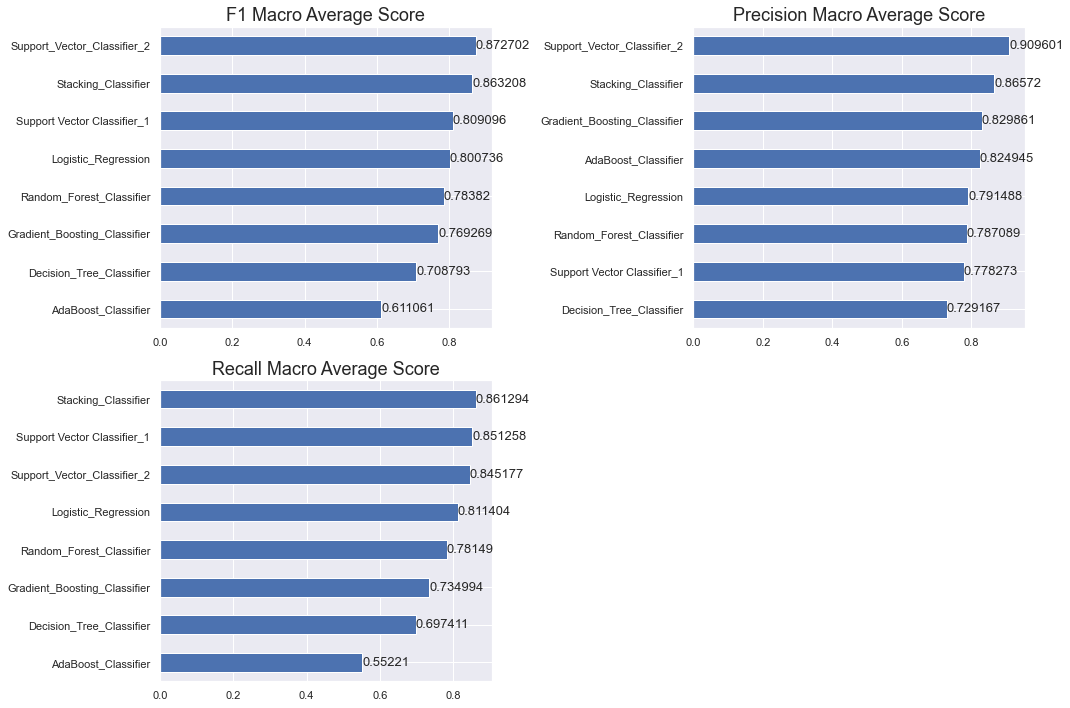

In [212]:
# Comparing the performance metrics of all models
plt.rcParams["figure.figsize"] =(15,10) 
fig, ax = plt.subplots(nrows=2, ncols=2) 

# plot and label
plot_barh1 = performance_metrics_df.f1_macro_score.sort_values().plot(kind='barh',ax=ax[0,0])
plot_barh1.bar_label(plot_barh1.containers[0], fontsize =13)

# plot and label
plot_barh2 = performance_metrics_df.precision_macro_score.sort_values().plot(kind='barh',ax=ax[0,1])
plot_barh2.bar_label(plot_barh2.containers[0], fontsize =13)

# plot and label
plot_barh3 = performance_metrics_df.recall_macro_score.sort_values().plot(kind='barh',ax=ax[1,0])
plot_barh3.bar_label(plot_barh3.containers[0], fontsize =13)

# set title
ax[0,0].set_title("F1 Macro Average Score",fontsize =18)
ax[0,1].set_title("Precision Macro Average Score",fontsize =18)
ax[1,0].set_title("Recall Macro Average Score",fontsize =18)

# turn off the axis
plt.axis('off')

plt.tight_layout()
plt.show()

*Support_Vector_Classifier_2 model is the better model with highest F1 Macro Average score (0.8727)*

##### Finding out the best geralized model using Train accuracy and Test accuracy

Text(0.5, 1.0, 'Train Accuracy and Test Accuracy')

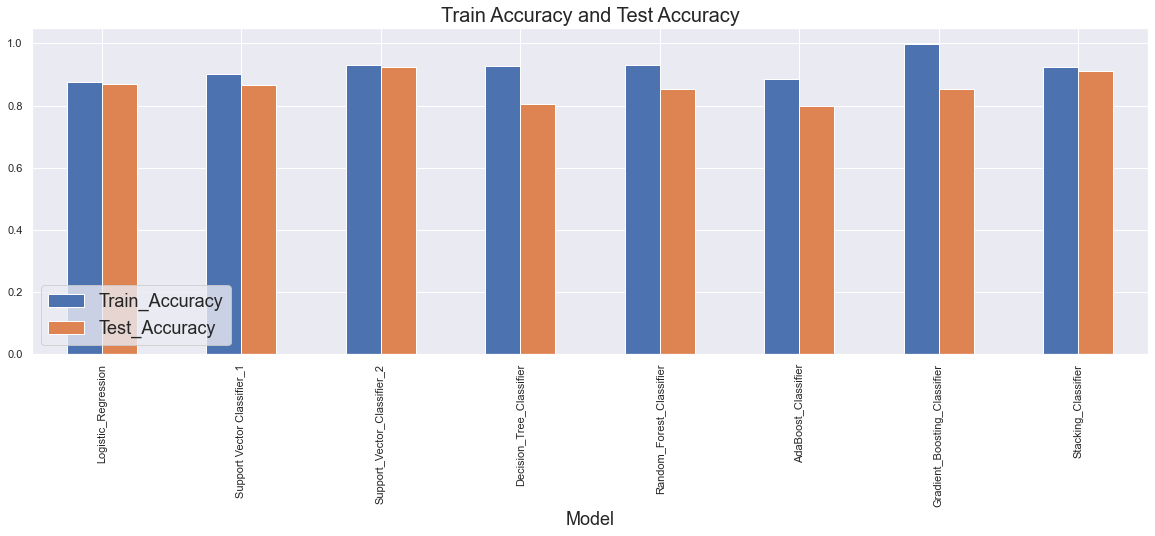

In [213]:
# Finding out geralized model using Train accuracy and Test accuracy
plt.rcParams["figure.figsize"] =(20,6)
plot_barh = performance_metrics_df[['Train_Accuracy','Test_Accuracy']].plot(kind='bar')
plt.legend(loc='lower left',fontsize = 18) 
plt.xlabel('Model',fontsize = 18)
plt.title("Train Accuracy and Test Accuracy",fontsize = 20)

* Generalized models - Logistic_Regression, Support_Vector_Classifier_2, Stacking_Classifier (LogisticRegression + SVC + RandomForestClassifier)
* All other models are overfitting

#### Displaying the result of the better performing model

In [214]:
test_data_results_df[['Actual_PerformanceRating','Predicted_PerformanceRating_Support_Vector_Classifier_2']].head(100)

,Actual_PerformanceRating,Predicted_PerformanceRating_Support_Vector_Classifier_2
0,3,3
1,3,3
2,2,3
3,2,2
4,3,3
5,3,3
6,2,2
7,3,3
8,3,3
9,3,3


In [215]:
performance_metrics_df.loc['Support_Vector_Classifier_2']

cv_f1_macro_score        0.790200
cv_std_score             0.014800
Train_Accuracy           0.931250
Test_Accuracy            0.925000
f1_macro_score           0.872702
precision_macro_score    0.909601
recall_macro_score       0.845177
Name: Support_Vector_Classifier_2, dtype: float64

[Text(0, 0.5, '2'), Text(0, 1.5, '3'), Text(0, 2.5, '4')]

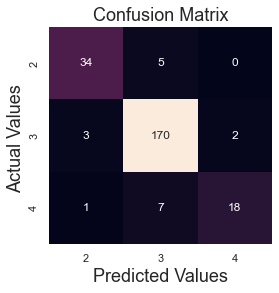

In [216]:
# Plotting confusion Matrix
conf_matrix = (confusion_matrix(test_data_results_df.Actual_PerformanceRating,
                               test_data_results_df.Predicted_PerformanceRating_Support_Vector_Classifier_2))

plt.rcParams["figure.figsize"] =(4,4)
# Using Seaborn heatmap to create the plot
fx = sns.heatmap(conf_matrix, annot=True, fmt='g',cbar=False)
# labels the title and x, y axis of plot
fx.set_title('Confusion Matrix',fontsize=18);
fx.set_xlabel('Predicted Values',fontsize=18,)
fx.set_ylabel('Actual Values ', fontsize=18);
# labels the boxes
fx.xaxis.set_ticklabels(['2','3','4'])
fx.yaxis.set_ticklabels(['2','3','4'])

In [217]:
# Classification Report
print(classification_report(test_data_results_df.Actual_PerformanceRating,
                            test_data_results_df.Predicted_PerformanceRating_Support_Vector_Classifier_2))

              precision    recall  f1-score   support

           2       0.89      0.87      0.88        39
           3       0.93      0.97      0.95       175
           4       0.90      0.69      0.78        26

    accuracy                           0.93       240
   macro avg       0.91      0.85      0.87       240
weighted avg       0.92      0.93      0.92       240



#### Permutation importance for feature evaluation

In [218]:
test_data_results_df[test_data_results_df.columns[1:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           240 non-null    int64 
 1   MaritalStatus                 240 non-null    object
 2   EmpDepartment                 240 non-null    object
 3   EmpJobRole                    240 non-null    object
 4   BusinessTravelFrequency       240 non-null    object
 5   DistanceFromHome              240 non-null    int64 
 6   EmpEducationLevel             240 non-null    int64 
 7   EmpEnvironmentSatisfaction    240 non-null    int64 
 8   EmpHourlyRate                 240 non-null    int64 
 9   EmpJobInvolvement             240 non-null    int64 
 10  EmpJobLevel                   240 non-null    int64 
 11  NumCompaniesWorked            240 non-null    int64 
 12  OverTime                      240 non-null    object
 13  EmpLastSalaryHikePer

Text(0.5, 0, 'Permutation Importance')

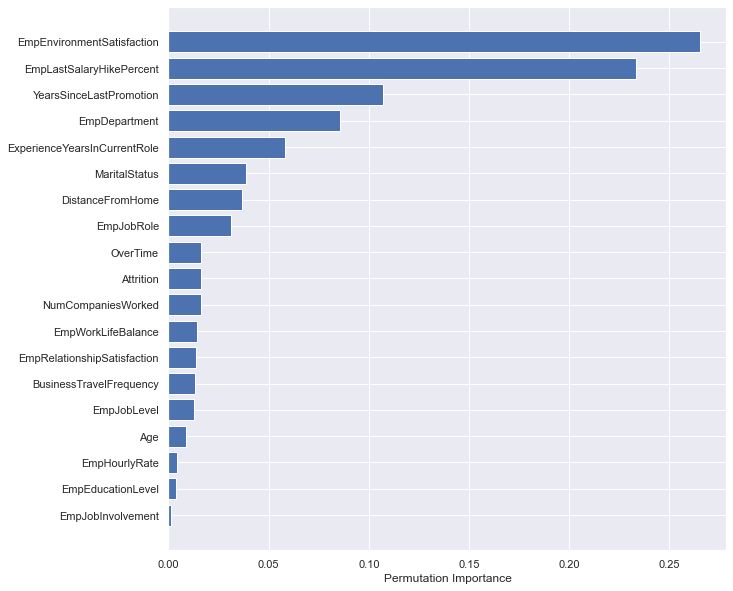

In [223]:
# As rbf (Radial basis function) kernal is used, permutation importance is used to get Feature Importance

# Loading the best model
best_model = pickle.load(open(processed_file_location + 'Support_Vector_Classifier_2_trained_model.pkl', 'rb'))

perm_importance = permutation_importance(pickled_model, test_data_results_df[test_data_results_df.columns[1:20]],
                                         test_data_results_df.Actual_PerformanceRating,scoring='f1_macro')

features = np.array(test_data_results_df.columns[1:20]) # column names used for X_test

sorted_idx = perm_importance.importances_mean.argsort()

plt.rcParams["figure.figsize"] =(10,10)

# plot the permutation 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Permutation Importance")

* EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, YearsSinceLastPromotion, EmpDepartment, ExperienceYearsInCurrentRole and DistanceFromHome plays major role in predicting Employee's Performance Rating

#### Exporting the finalized model

In [220]:
# Exporting finalized_model
pickle.dump(best_model, open(processed_file_location + 'finalized_svc_model.pkl', 'wb'))

### Summary

**Importing necessary libraries**
* pandas
* numpy
* Visualizations using matplotlib and seaborn
* pickle to load the model for feature importance.
* accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score from sklearn.metrics for model evaluation
* permutation_importance from sklearn for feature importance

**Loading the train and test data with predicted results from processed directory**
* Train data and Test data are loaded from file location data-> processed -> train_data_with_predicted_results.csv, test_data_with_predicted_results.csv

**Model Evaluation**

   ***Performance Metrics Report***
   * Below models are evaluated using accuracy_score,f1_score,precision_score,recall_score
       * Logistic_Regression,
       * Support Vector Classifier_1
       * Support_Vector_Classifier_2
       * Decision_Tree_Classifier
       * Random_Forest_Classifier
       * AdaBoost_Classifier
       * Gradient_Boosting_Classifier
       * Stacking_Classifier (LogisticRegression + SVC + RandomForestClassifier)
   
   
   ***Comparing the performance metrics of all models***
   * Support_Vector_Classifier_2 model is the better model with highest F1 Macro Average score (0.8727)
  
  
   ***Finding out the best geralized model using Train accuracy and Test accuracy***
   * Generalized models - Logistic_Regression, Support_Vector_Classifier_2, Stacking_Classifier (LogisticRegression + SVC + RandomForestClassifier)
    * All other models are overfitting

**Displaying the result of the best generalized model**
* Plotting confusion Matrix using seaborn heatmap.
* Performance metrics of finalized_svc_model:
	* cross_validation_f1_macro_score   0.790200
	* cross_validation_std_score        0.014800
	* Train_Accuracy           0.931250
	* Test_Accuracy            0.925000
	* f1_macro_score           0.872702
	* precision_macro_score    0.909601
	* recall_macro_score       0.845177
    
**Permutation importance for feature evaluation**
* As rbf (Radial basis function) kernal is used in better performing Support_Vector_Classifier_2 model, permutation importance is used to get Feature Importance
* EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, YearsSinceLastPromotion, EmpDepartment, ExperienceYearsInCurrentRole and DistanceFromHome plays major role in predicting Employee's Performance Rating

**Exporting the finalized model**
* Best model is exported using pickle as finalized_svc_model.pkl in the processed folder.

### Conclusion

***Support Vector Classifier 2 is the better generalized model with 92.5% Accuracy and 87.27% F1 Macro Average score to predict Performance Rating of the employees***

In [228]:
performance_metrics_df.loc['Support_Vector_Classifier_2']

cv_f1_macro_score        0.790200
cv_std_score             0.014800
Train_Accuracy           0.931250
Test_Accuracy            0.925000
f1_macro_score           0.872702
precision_macro_score    0.909601
recall_macro_score       0.845177
Name: Support_Vector_Classifier_2, dtype: float64